In [1]:
import Ab as ab
import datetime as dt
import pandas as pd
#use east coast time zone
#sd = dt.datetime(2018,12,28) - dt.timedelta(days=7*14)
#ed = dt.datetime(2019,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2020,1,3) - dt.timedelta(days=7*15)
#ed = dt.datetime(2020,12,31) + dt.timedelta(days=1)
#sd = dt.datetime(2021,1,1) - dt.timedelta(days=7*15)
#ed = dt.datetime(2021,12,31) + dt.timedelta(days=1)
sd = dt.datetime(2018,4,7) - dt.timedelta(days=200)
ed = dt.datetime(2023,4,7) + dt.timedelta(days=1)


tqqq = ab.StockData('TQQQ')
tqqq.get_data_from_yfinance('TQQQ',sd,ed+dt.timedelta(days=1))


tqqq_weekly = ab.StockData('TQQQ')
tqqq_weekly.get_data_from_yfinance('TQQQ', sd, ed+dt.timedelta(days=1), interval='1wk')


#set max number of rows to display
pd.set_option('display.max_rows', 1000)

GPU acceleration is available
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
tqqq.get_k('Close', 14)
tqqq.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
tqqq.get_ema('Close-K14', 5)
tqqq.get_ema('Close-K14-EMA5', 5)
tqqq.data.rename(columns={'Close-K14-EMA5-EMA5':'D%D', 'Close-K14-EMA5':'D%K'}, inplace=True)



In [3]:
#Fast Stochastic Oscillator:
#Fast %K = %K basic calculation
#Fast %D = 5-period SMA of Fast %K
tqqq_weekly.get_k('Close', 14)
tqqq_weekly.get_ema('Close-K14', 5)

#Slow Stochastic Oscillator:
#Slow %K = 5-period EMA of Fast %K
#Slow %D = 5-period EMA of Slow %K
tqqq_weekly.get_ema('Close-K14', 5)
tqqq_weekly.get_ema('Close-K14-EMA5', 5)
#rename to %K and %D
tqqq_weekly.data.rename(columns={'Close-K14-EMA5-EMA5':'W%D', 'Close-K14-EMA5':'W%K'}, inplace=True)


<Axes: xlabel='Date'>

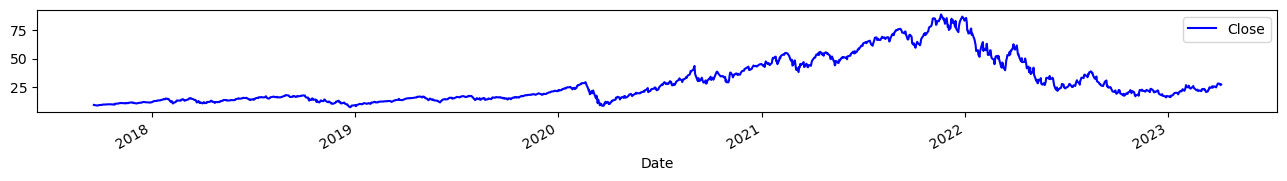

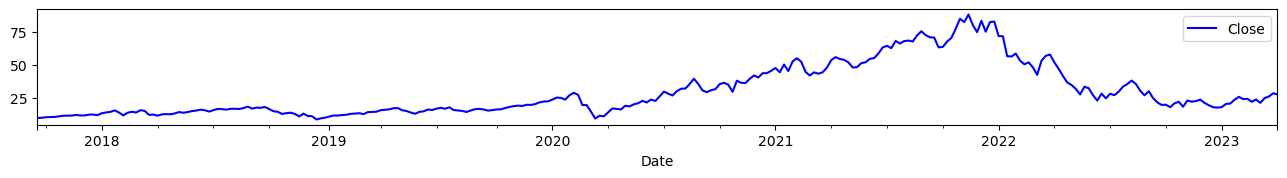

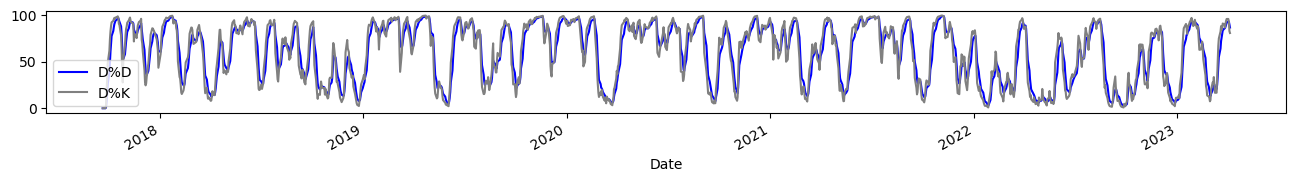

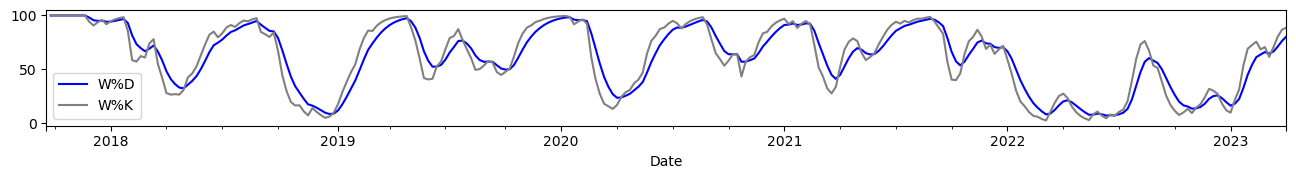

In [4]:
tqqq.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
tqqq_weekly.data.plot(y=['Close'], figsize=(16,1.5), sharey=True, color=['blue'])
#plotting the slow stochastic oscillator with blue and green lines
tqqq.data.plot(y=['D%D','D%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'])
#plotting the slow stochastic oscillator with blue and green lines
tqqq_weekly.data.plot(y=['W%D', 'W%K'], figsize=(16,1.5), sharey=True, color=['blue', 'grey'],)

In [5]:
test_start = dt.datetime(2018,4,7)
test_end =   dt.datetime(2023,4,7)


In [6]:
#buy and hold
bah = ab.BuyAndHold(tqqq)
#time the execution of the strategy
bah.run_strategy(tqqq,test_start,test_end)

/home/zishuowang/backtesting/Ab.py:161: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  sd = indicator.data.index[indicator.data.index.get_loc(


In [7]:

bah_bt = ab.BackTest()
bah_bt.run_backtest(bah,tqqq,test_start,test_end)


<Ab.StockData object at 0x7f021039fd90>: 
cumulative return      : 141.87%
compound anual return  : 5.1232% 
max_drawdown           : -81.11%
sharp_ratio            : 3.92%
average of daily return: 0.1901%
std of daily return    : 4.8514%
number of trades       : 2,
trading days           : 1823,
Betting Average        : 100.00%
Gain Average           : 141.87%
Loss Average           : nan%
Risk Reward Ratio      : nan
Gain STD               : nan%
Loss STD               : nan%
        
    Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0 2018-04-09  2023-04-06 00:00:00   TQQQ  0.088177  11.340833       27.43   

     Profit  Profit %  
0  1.418694  1.418694  


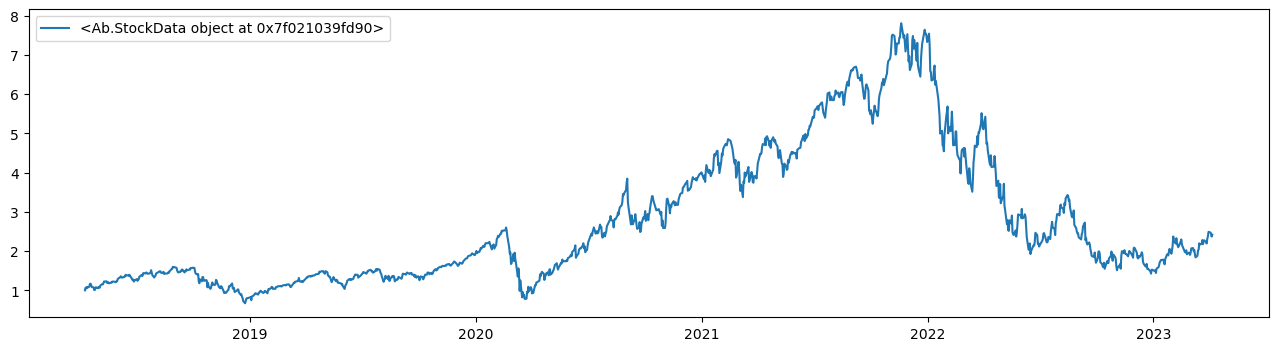

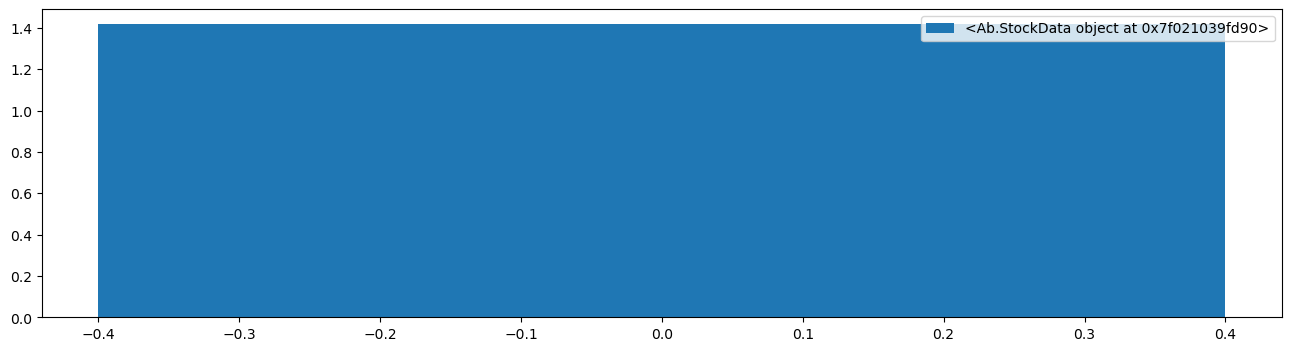

In [8]:

bah_bt.plot_balance()
bah_bt.plot_records()
bah_bt.performance_summary()
print(bah_bt.trade_records)

In [9]:
stg = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, 0, 0, 0)
stg.run_strategy([tqqq,tqqq_weekly], test_start, test_end)
sc_bt = ab.BackTest()
sc_bt.run_backtest(stg,tqqq,test_start,test_end)



StochasticCross: 
cumulative return      : 1758.77%
compound anual return  : 50.6216% 
max_drawdown           : -33.77%
sharp_ratio            : 10.00%
average of daily return: 0.2689%
std of daily return    : 2.6891%
number of trades       : 20,
trading days           : 1823,
Betting Average        : 73.68%
Gain Average           : 27.23%
Loss Average           : -6.05%
Risk Reward Ratio      : 4.50
Gain STD               : 17.87%
Loss STD               : 5.27%
        


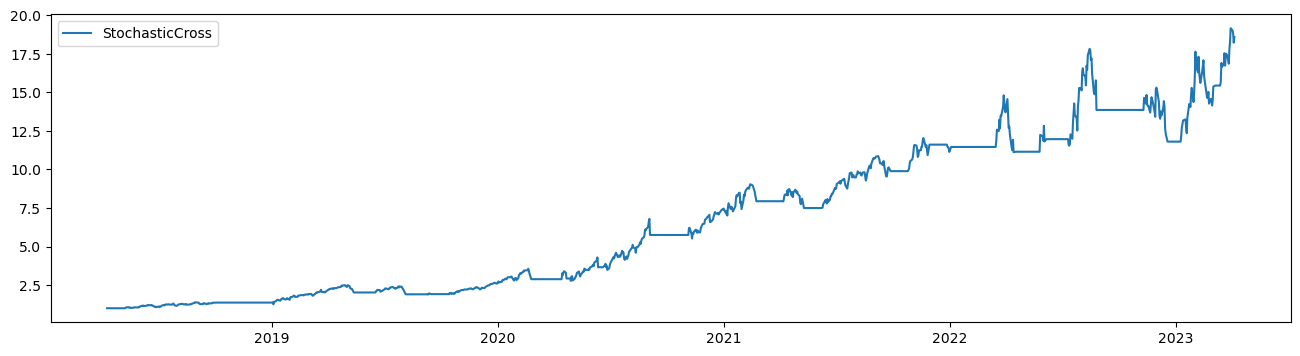

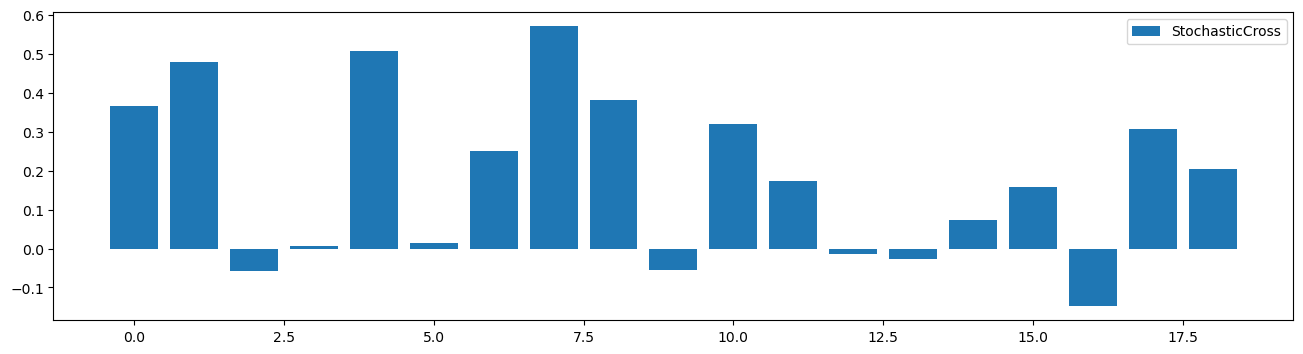

In [10]:

sc_bt.plot_balance()
sc_bt.plot_records()
sc_bt.performance_summary()


In [11]:
print(sc_bt.trade_records)
print(sc_bt.joined_data.tail(100))

     Buy Date            Sell Date Ticker     Quant  Buy Price  Sell Price  \
0  2018-05-07  2018-10-01 00:00:00   TQQQ  0.076321  13.102500   17.887501   
1  2018-12-31  2019-05-13 00:00:00   TQQQ  0.147430   9.260000   13.705000   
2  2019-06-17  2019-08-05 00:00:00   TQQQ  0.137732  14.670000   13.810000   
3  2019-09-09  2019-09-16 00:00:00   TQQQ  0.118898  15.997500   16.094999   
4  2019-10-14  2020-02-24 00:00:00   TQQQ  0.120527  15.877500   23.920000   
5  2020-04-13  2020-04-21 00:00:00   TQQQ  0.203854  14.142500   14.357500   
6  2020-04-27  2020-06-11 00:00:00   TQQQ  0.176395  16.592501   20.750000   
7  2020-06-18  2020-09-03 00:00:00   TQQQ  0.155670  23.512501   36.932499   
8  2020-11-04  2021-02-22 00:00:00   TQQQ  0.164171  35.020000   48.349998   
9  2021-04-05  2021-05-10 00:00:00   TQQQ  0.156162  50.830002   48.000000   
10 2021-06-07  2021-09-27 00:00:00   TQQQ  0.142912  52.450001   69.184998   
11 2021-10-25  2021-11-29 00:00:00   TQQQ  0.135890  72.760002  

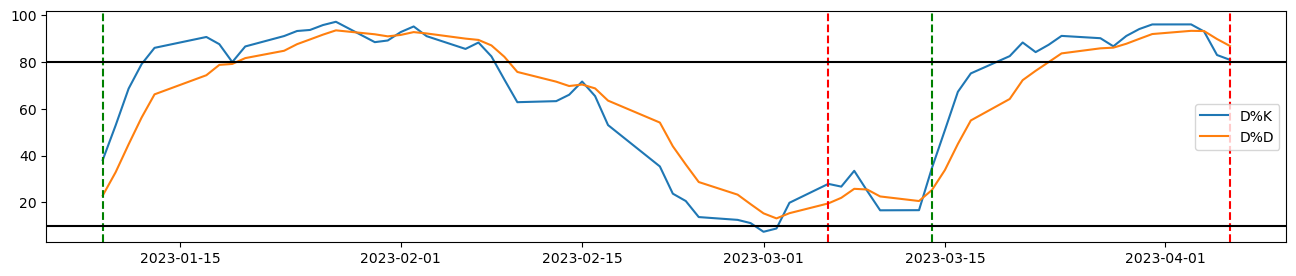

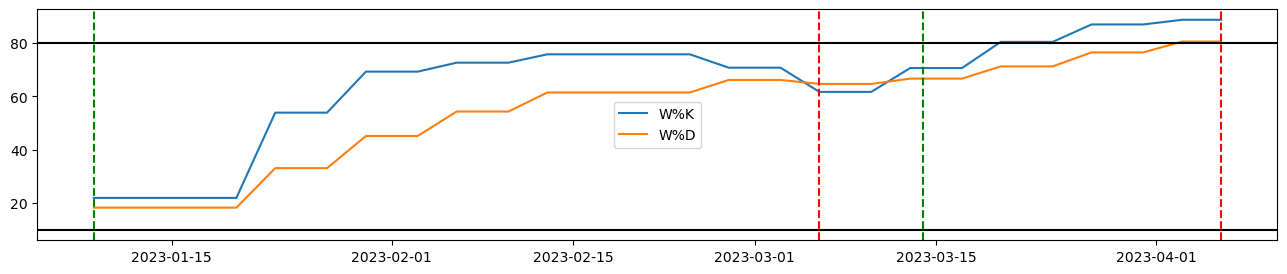

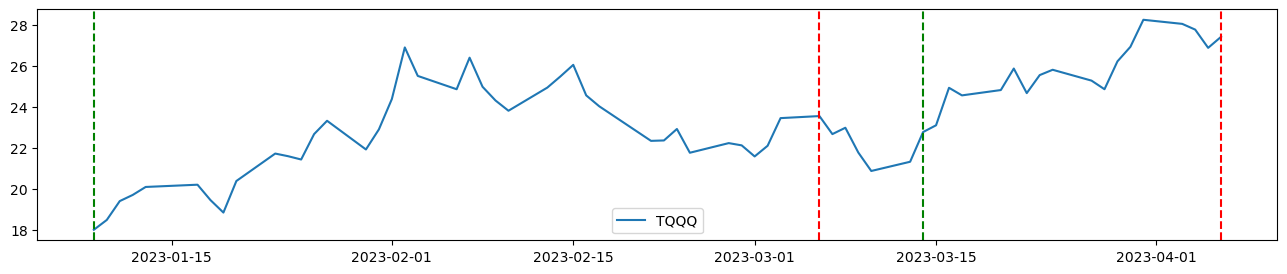

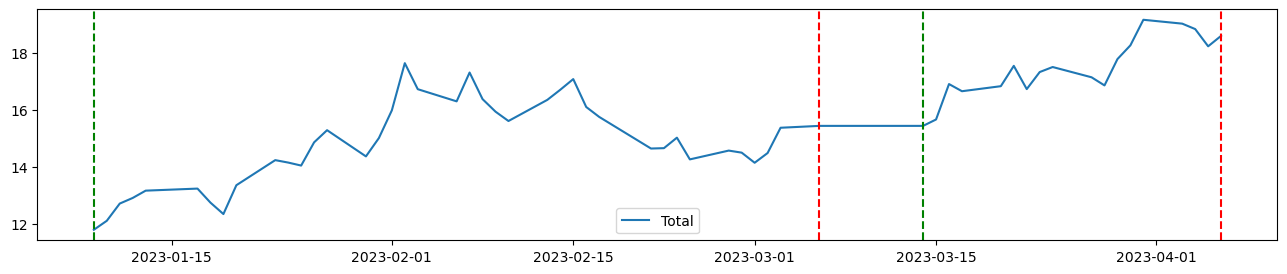

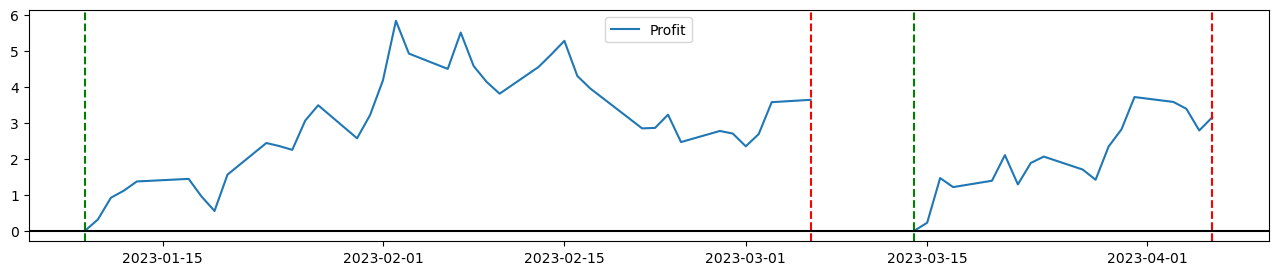

In [12]:
p_sd = dt.datetime(2018,4,7)
p_ed =   dt.datetime(2023,4,7)
sc_bt.plot_joined_data(['D%K','D%D'], p_sd, p_ed, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['W%K','W%D'], p_sd, p_ed, ydash_low=stg.oversold, ydash_high=stg.overbought)
sc_bt.plot_joined_data(['TQQQ'], p_sd, p_ed)
sc_bt.plot_joined_data(['Total'], p_sd, p_ed)
sc_bt.plot_joined_data(['Profit'], p_sd, p_ed, ydash_low=0)


StochasticCross: 
cumulative return      : 493.64%
compound anual return  : 25.6201% 
max_drawdown           : -39.92%
sharp_ratio            : 7.17%
average of daily return: 0.1701%
std of daily return    : 2.3726%
number of trades       : 27,
trading days           : 1823,
Betting Average        : 53.85%
Gain Average           : 20.22%
Loss Average           : -5.30%
Risk Reward Ratio      : 3.81
Gain STD               : 17.87%
Loss STD               : 3.32%
        


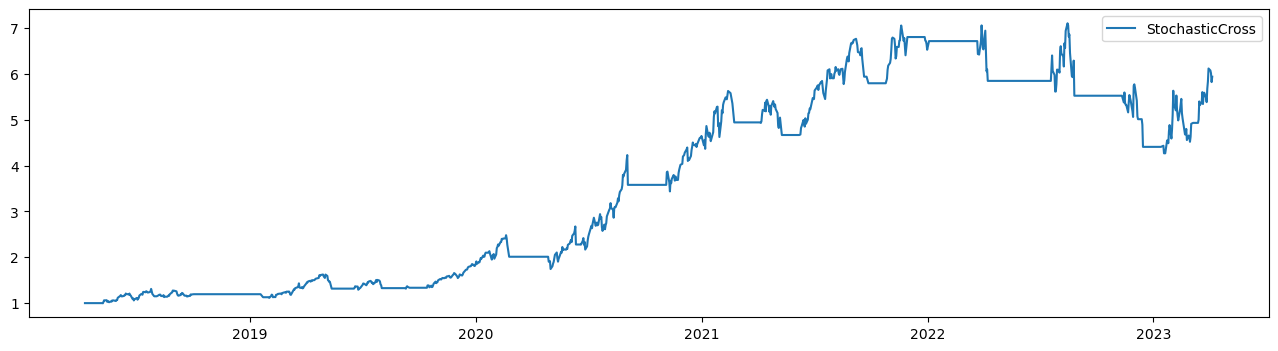

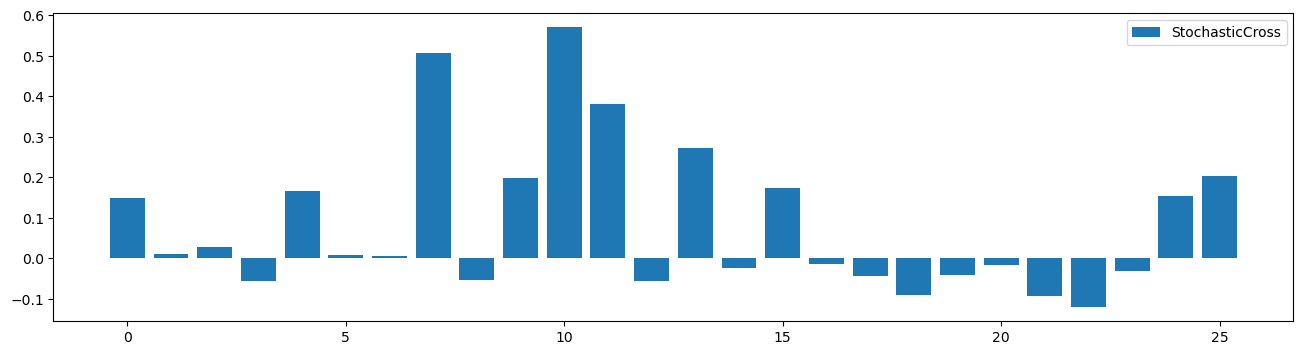

In [13]:
stg_50ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, ma_notrade=50)
stg_50ma.run_strategy([tqqq,tqqq_weekly], test_start, test_end)

stg_50ma_bt = ab.BackTest()
stg_50ma_bt.run_backtest(stg_50ma,tqqq,test_start,test_end)
stg_50ma_bt.plot_balance()
stg_50ma_bt.plot_records()
stg_50ma_bt.performance_summary()



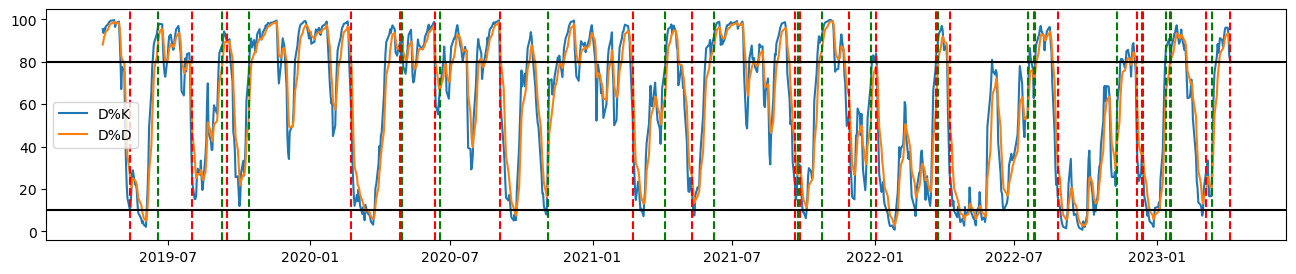

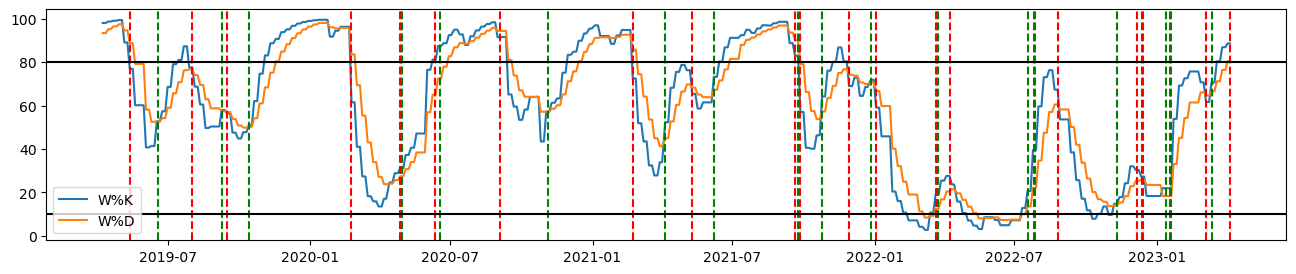

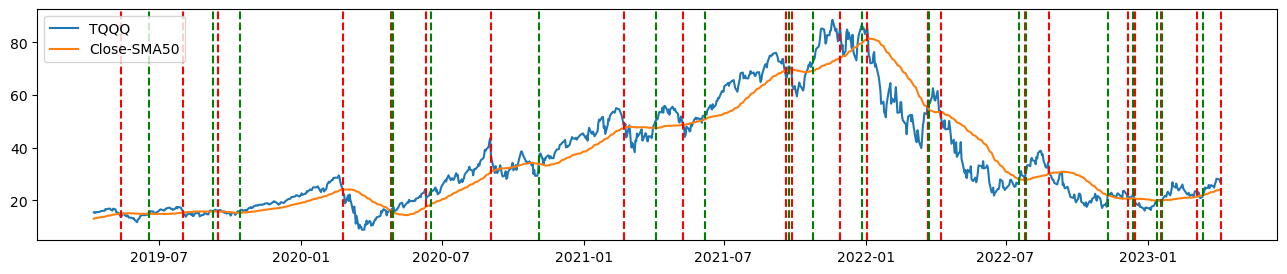

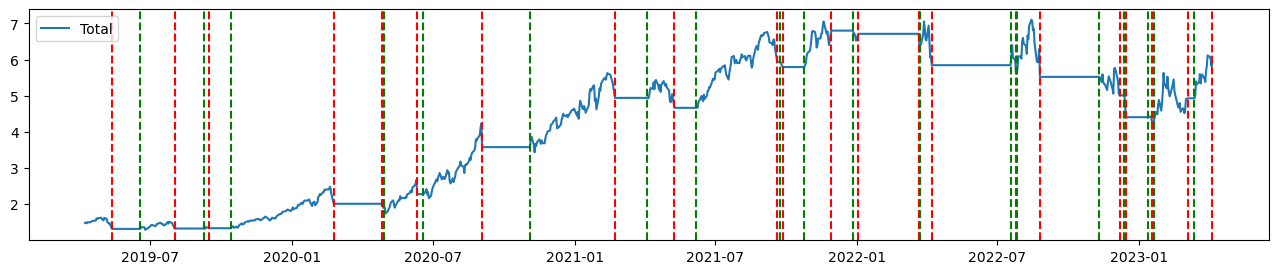

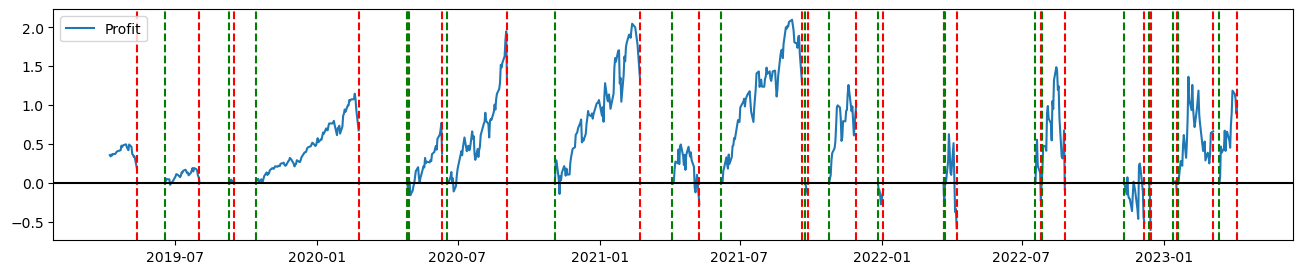

In [14]:
p_sd = dt.datetime(2019,4,7)
p_ed =   dt.datetime(2023,4,7)
stg_50ma_bt.plot_joined_data(['D%K','D%D'], p_sd, p_ed, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data(['W%K','W%D'], p_sd, p_ed, ydash_low=stg_50ma.oversold, ydash_high=stg_50ma.overbought)
stg_50ma_bt.plot_joined_data(['TQQQ', 'Close-SMA50'], p_sd, p_ed)
stg_50ma_bt.plot_joined_data(['Total'], p_sd, p_ed)
stg_50ma_bt.plot_joined_data(['Profit'], p_sd, p_ed, ydash_low=0)


StochasticCross: 
cumulative return      : 474.70%
compound anual return  : 24.9198% 
max_drawdown           : -24.34%
sharp_ratio            : 8.05%
average of daily return: 0.1588%
std of daily return    : 1.9721%
number of trades       : 18,
trading days           : 1823,
Betting Average        : 52.94%
Gain Average           : 27.76%
Loss Average           : -4.36%
Risk Reward Ratio      : 6.37
Gain STD               : 19.84%
Loss STD               : 2.26%
        


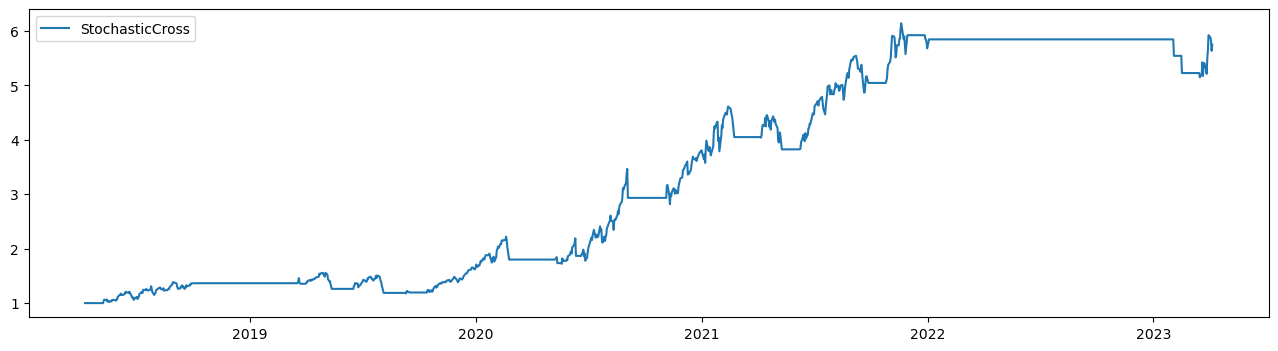

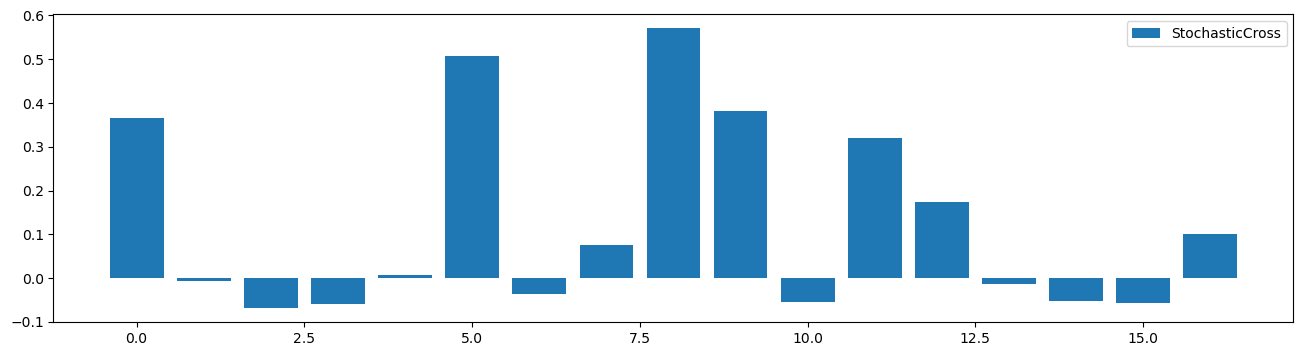

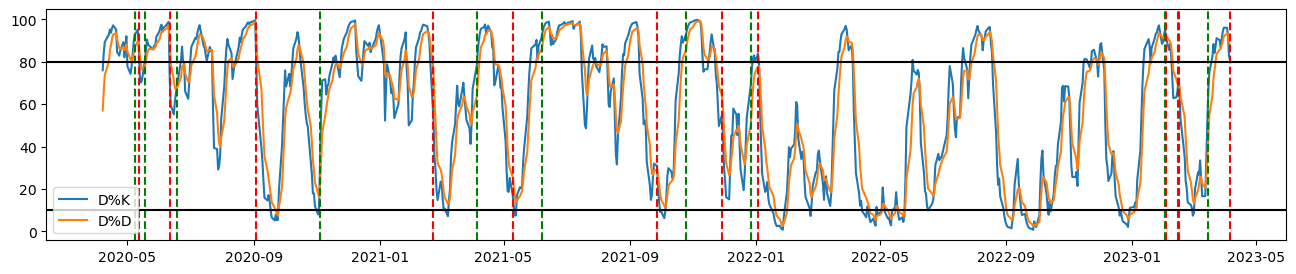

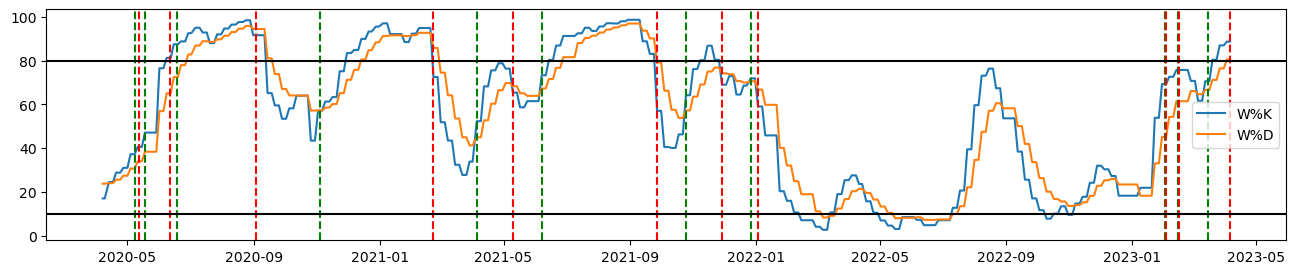

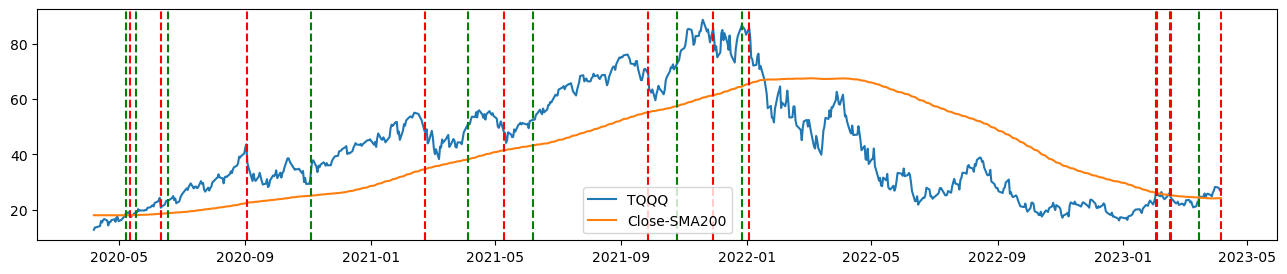

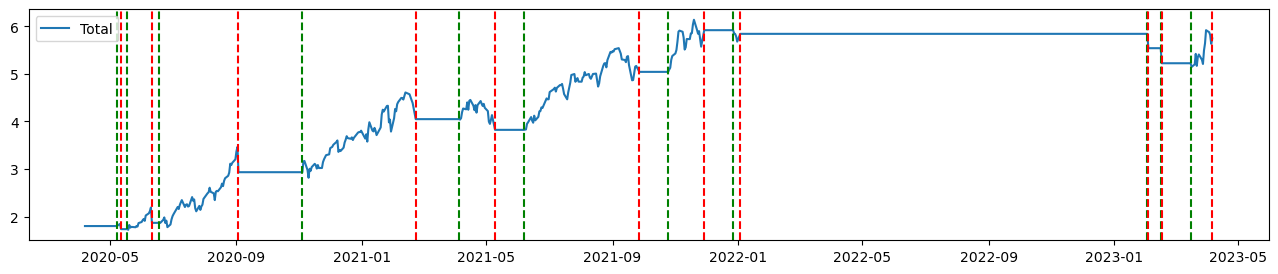

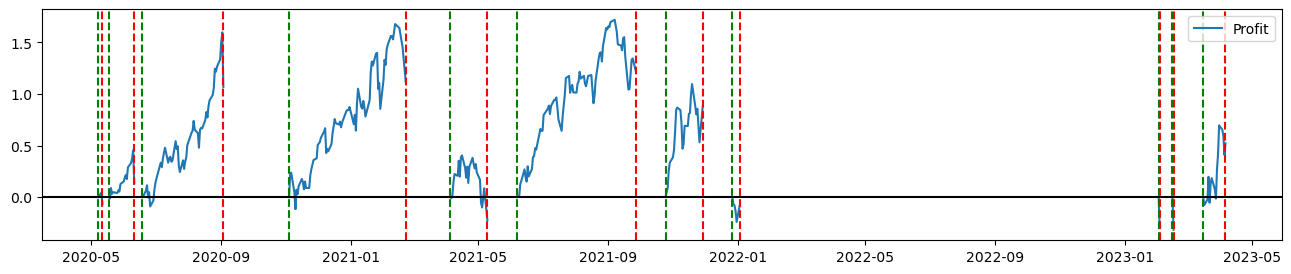

In [15]:
stg_200ma = ab.StochasticCross('StochasticCross',14, 5, 5, 80, 10, ma_notrade=200)
stg_200ma.run_strategy([tqqq,tqqq_weekly], test_start, test_end)

stg_200ma_bt = ab.BackTest()
stg_200ma_bt.run_backtest(stg_200ma,tqqq,test_start,test_end)

stg_200ma_bt.plot_balance()
stg_200ma_bt.plot_records()
stg_200ma_bt.performance_summary()

p_sd = dt.datetime(2020,4,7)
p_ed =   dt.datetime(2023,4,7)
stg_200ma_bt.plot_joined_data(['D%K','D%D'], p_sd, p_ed, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data(['W%K','W%D'], p_sd, p_ed, ydash_low=stg_200ma.oversold, ydash_high=stg_200ma.overbought)
stg_200ma_bt.plot_joined_data(['TQQQ','Close-SMA200'], p_sd, p_ed)
stg_200ma_bt.plot_joined_data(['Total'], p_sd, p_ed)
stg_200ma_bt.plot_joined_data(['Profit'], p_sd, p_ed, ydash_low=0)